#                         *Prediction of Bitcoin-USD Using ARIMA and LSTM* 


# 1- Load the Data

There are many resources that we can use to obtain historical data. Our dataset comes from Yahoo Finance and covers all available data from 2014-09-17 to 2019-10-31 on the price of Bitcoin-USD.

In [50]:
#import packages
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 30,15 #width 20, height 10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [51]:
import os 
os.getcwd() # path

'/Users/messidzochokki'

In [52]:
#read the file
df = pd.read_csv('/Users/messidzochokki/Desktop/BTC-USD.csv', sep=',').fillna(0)

#print the head
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


# 2- Exploratory Data Analysis

In [53]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1871.000000,1871.000000,1871.000000,1871.000000,1871.000000,1.871000e+03
mean,3626.865976,3728.706495,3517.358292,3631.432324,3631.432324,4.235816e+09
std,3949.154783,4083.801383,3790.581922,3950.540306,3950.540306,6.685812e+09
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,405.615997,414.781494,393.056503,405.827499,405.827499,5.059385e+07
50%,1211.079956,1232.199951,1196.760010,1211.670044,1211.670044,3.725350e+08
75%,6539.505127,6630.100098,6448.455078,6539.040039,6539.040039,5.526930e+09
max,19475.800781,20089.000000,18974.099609,19497.400391,19497.400391,4.510573e+10


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1871 entries, 0 to 1870
Data columns (total 7 columns):
Date         1871 non-null object
Open         1871 non-null float64
High         1871 non-null float64
Low          1871 non-null float64
Close        1871 non-null float64
Adj Close    1871 non-null float64
Volume       1871 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 102.4+ KB


Text(0, 0.5, 'BITCOIN-USD')

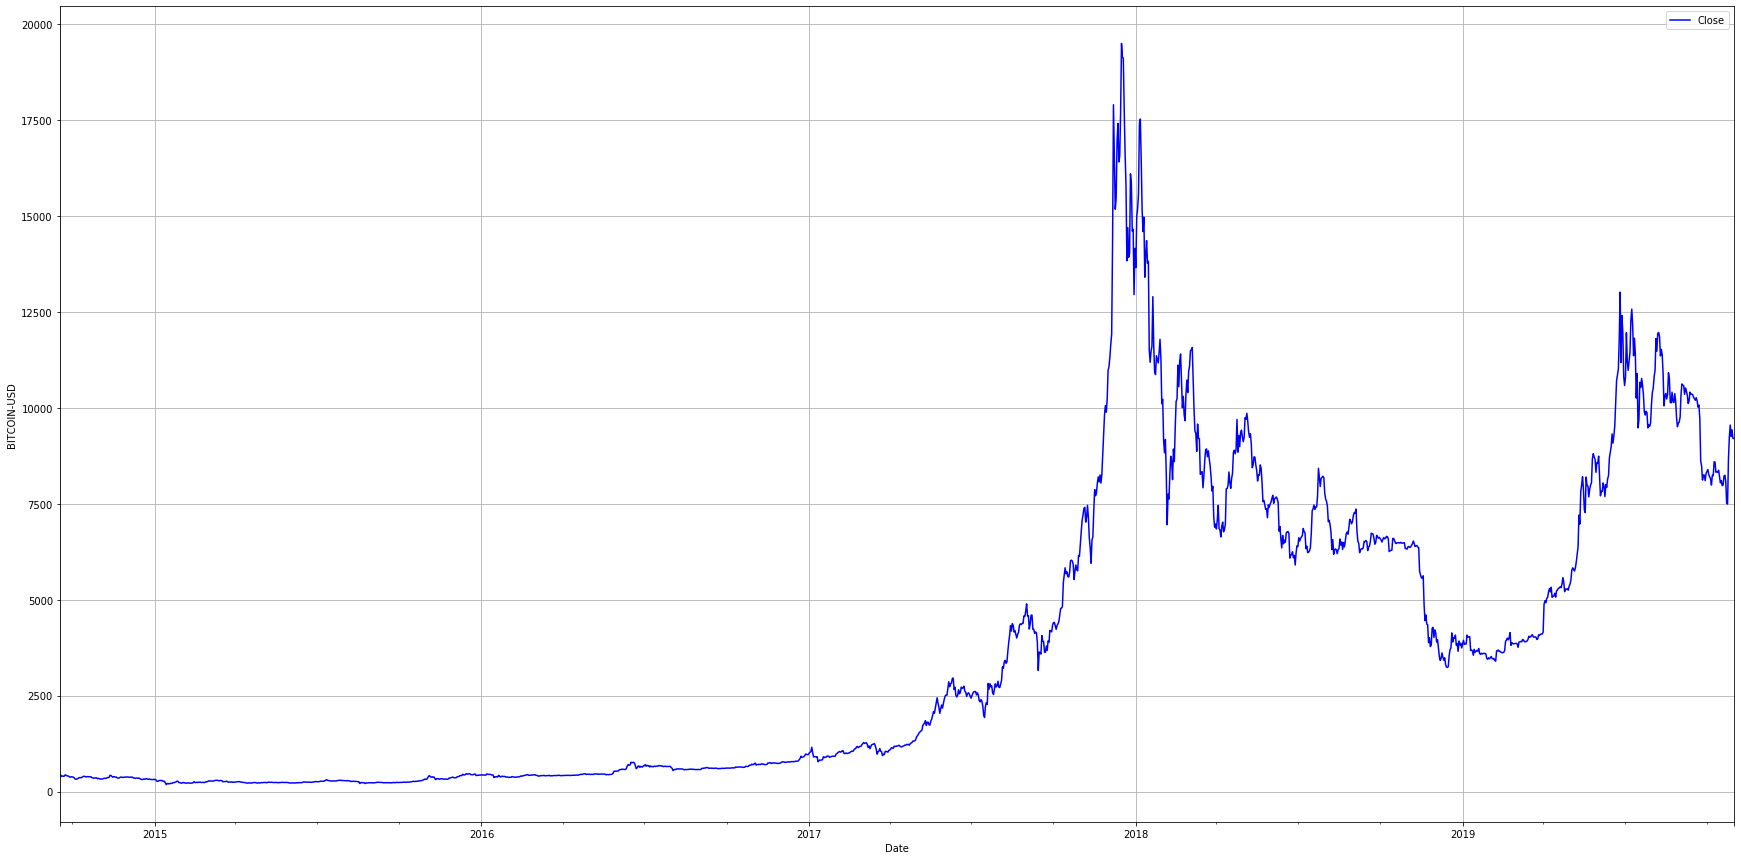

In [55]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

ax = df.plot(x='Date', y='Close', style='b-', grid=True)
ax.set_xlabel("Date")
ax.set_ylabel("BITCOIN-USD")

In [56]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


Text(0, 0.5, 'BITCOIN-USD')

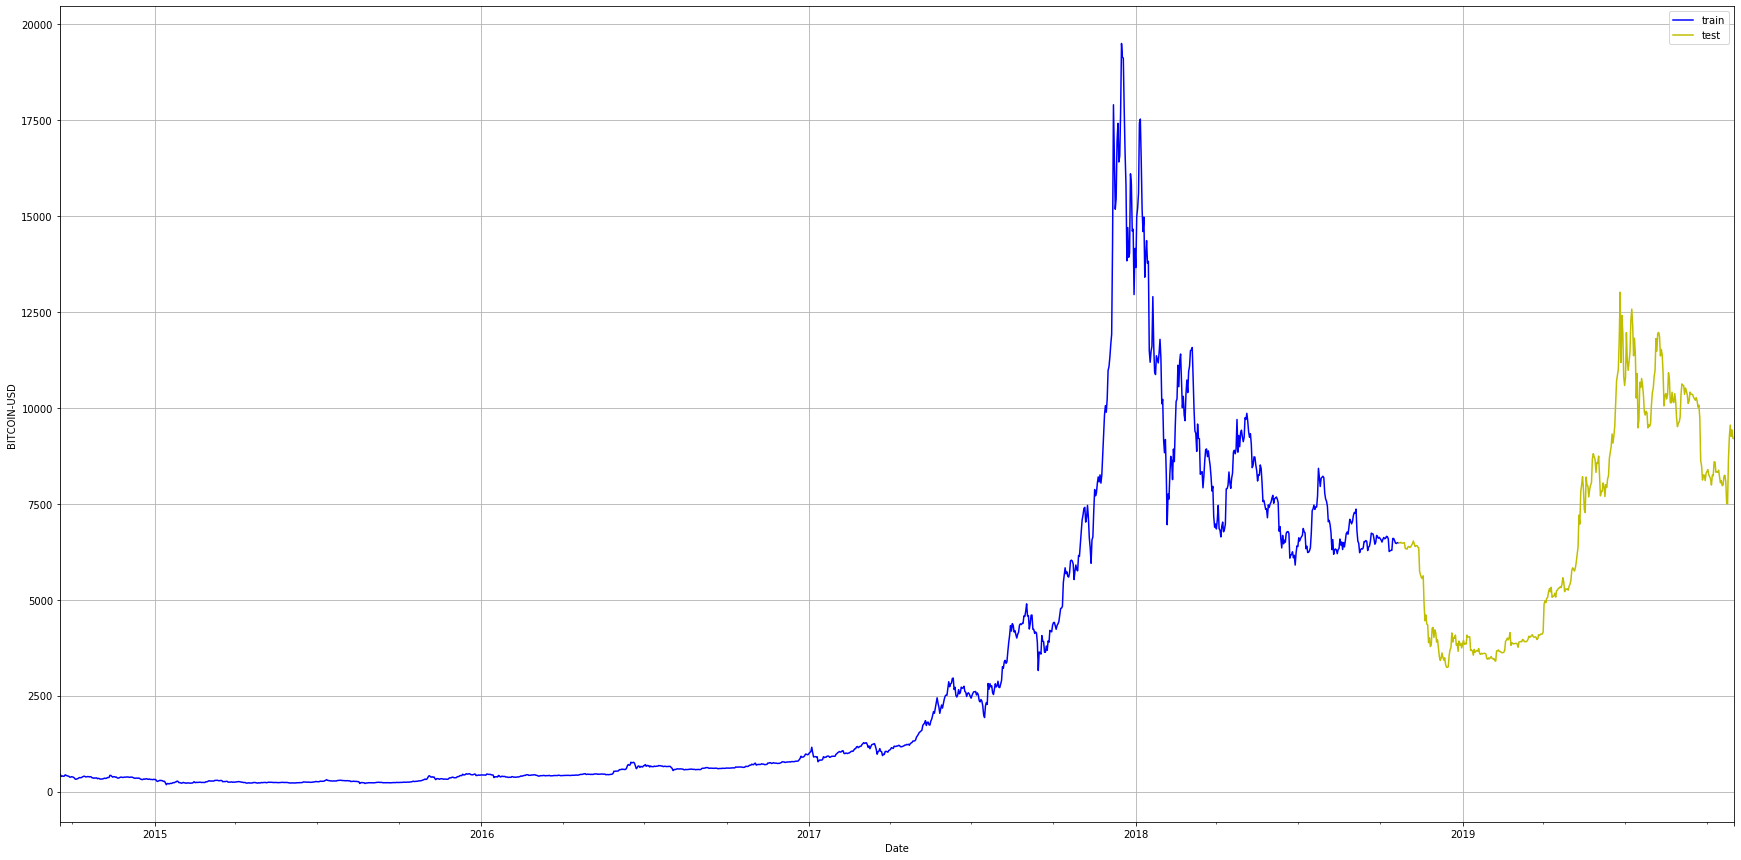

In [57]:
#from pyramid.arima import auto_arima
from pmdarima.arima import auto_arima
data = df.sort_index(ascending=True, axis=0)
data.head()

#split data
train, test = data[0:int(len(data)*0.8)], data[int(len(data)*0.8):]

#Plot data
ax = train.plot(x='Date', y='Close', style='b-', grid=True)
ax = test.plot(x='Date', y='Close', style='y-', grid=True, ax=ax)

ax.legend(['train','test'])
ax.set_xlabel("Date")
ax.set_ylabel("BITCOIN-USD")

In [58]:
# show the shape of data
print(train.shape)
print(test.shape)
training = train['Close']
validation = test['Close']
print(validation.shape)

(1496, 7)
(375, 7)
(375,)


# 3-Autoregressive Integrated Moving Average ( ARIMA)

In [59]:
model_autoARIMA = auto_arima(training, start_p=0, start_q=0,
                      test='adf',       # use adftest to find  optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 0); AIC=21012.145, BIC=21022.765, Fit time=0.087 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 0); AIC=21004.842, BIC=21020.772, Fit time=0.157 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 0); AIC=21004.160, BIC=21020.090, Fit time=0.289 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 0); AIC=21010.473, BIC=21015.783, Fit time=0.037 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 0); AIC=20998.824, BIC=21020.063, Fit time=0.620 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 0); AIC=21005.862, BIC=21032.412, Fit time=1.173 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 0); AIC=21006.422, BIC=21032.972, Fit time=0.460 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 0); AIC=21004.438, BIC=21025.677, Fit time=0.288 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 0, 0, 0); AIC=21004.601, BIC=21025.841, Fit time=0.271 seconds
Fit ARIMA: order=(2

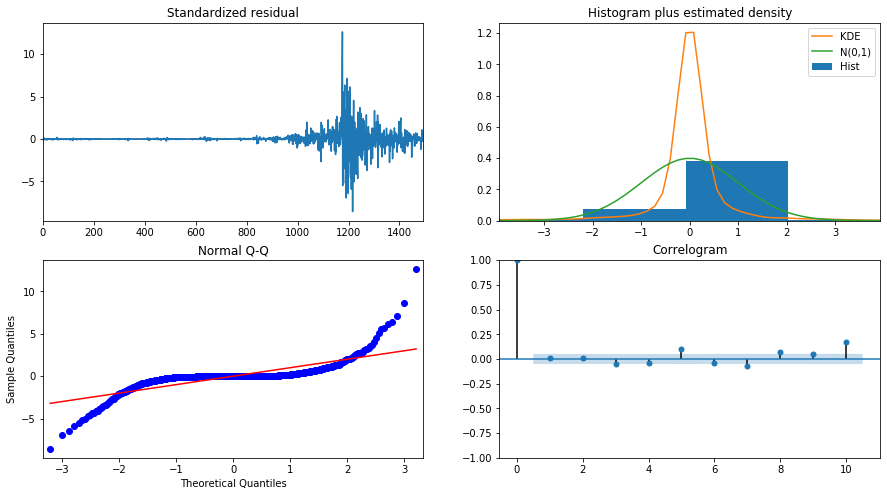

In [60]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [61]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(training, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1495
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -10495.365
Method:                       css-mle   S.D. of innovations            270.796
Date:                Tue, 24 Dec 2019   AIC                          20998.730
Time:                        09:02:18   BIC                          21019.970
Sample:                    09-18-2014   HQIC                         21006.644
                         - 10-21-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.0291      7.347      0.548      0.583     -10.370      18.428
ar.L1.D.Close    -0.6595      0.094     -7.028      0.000      -0.843      -0.476
ma.L1.D.Close     0.7408      0.083     

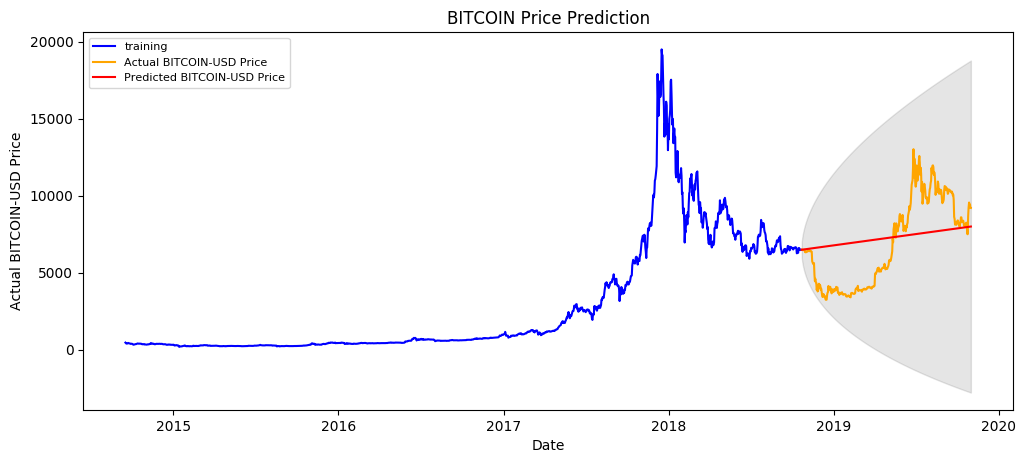

In [62]:
# Forecast
fc, se, conf = fitted.forecast(375, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=validation.index)

lower_series = pd.Series(conf[:, 0], index=validation.index)
upper_series = pd.Series(conf[:, 1], index=validation.index)

plt.figure(figsize=(12,5), dpi=100)

plt.plot(training, color = 'blue', label='training')
plt.plot(validation, color = 'orange', label='Actual BITCOIN-USD Price')
plt.plot(fc_series, color = 'red',label='Predicted BITCOIN-USD Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)

plt.title('BITCOIN Price Prediction')
plt.xlabel('Date')
plt.ylabel('Actual BITCOIN-USD Price')

plt.legend(loc='upper left', fontsize=8)




# 4-Long Short Term Memory Network  (LSTM)

In [63]:
import tensorflow as tf
from tensorflow.keras import layers

In [64]:
#creating dataframe

new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]
#print(new_data.head())

In [65]:
#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

In [66]:
#creating train and test sets
dataset = new_data.values
teps =10

train, valid = dataset[0:int(len(dataset)*0.8)], dataset[int(len(dataset)*0.8)-teps:]

In [67]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [68]:
X_train, y_train = [], []
for i in range(teps,len(train)):
    X_train.append(scaled_data[i-teps:i,0])
    y_train.append(scaled_data[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [69]:
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense  
from tensorflow.keras.layers import LSTM  
#from tensorflow.keras.layers import Dropout 

from tensorflow.keras import backend


lstm_model = tf.keras.Sequential()
lstm_model.add(tf.keras.layers.LSTM(20, input_shape=(X_train.shape[1], 1),return_sequences=True,dropout=0.2))
lstm_model.add(tf.keras.layers.LSTM(20, return_sequences=True, dropout =0.2))
lstm_model.add(tf.keras.layers.LSTM(20))
lstm_model.add(tf.keras.layers.Dense(1, activation=tf.nn.relu))


lstm_model.compile(optimizer="adam", loss="mean_squared_error")

lstm_model.fit(X_train, y_train, epochs=50, batch_size = 4, verbose=2)

Train on 1486 samples
Epoch 1/50
1486/1486 - 12s - loss: 0.0355
Epoch 2/50
1486/1486 - 8s - loss: 0.0033
Epoch 3/50
1486/1486 - 8s - loss: 0.0026
Epoch 4/50
1486/1486 - 9s - loss: 0.0028
Epoch 5/50
1486/1486 - 12s - loss: 0.0022
Epoch 6/50
1486/1486 - 9s - loss: 0.0024
Epoch 7/50
1486/1486 - 9s - loss: 0.0022
Epoch 8/50
1486/1486 - 8s - loss: 0.0024
Epoch 9/50
1486/1486 - 8s - loss: 0.0018
Epoch 10/50
1486/1486 - 9s - loss: 0.0017
Epoch 11/50
1486/1486 - 8s - loss: 0.0017
Epoch 12/50
1486/1486 - 8s - loss: 0.0018
Epoch 13/50
1486/1486 - 8s - loss: 0.0015
Epoch 14/50
1486/1486 - 8s - loss: 0.0016
Epoch 15/50
1486/1486 - 8s - loss: 0.0013
Epoch 16/50
1486/1486 - 8s - loss: 0.0013
Epoch 17/50
1486/1486 - 9s - loss: 0.0013
Epoch 18/50
1486/1486 - 8s - loss: 0.0015
Epoch 19/50
1486/1486 - 8s - loss: 0.0011
Epoch 20/50
1486/1486 - 10s - loss: 0.0012
Epoch 21/50
1486/1486 - 8s - loss: 0.0012
Epoch 22/50
1486/1486 - 8s - loss: 0.0013
Epoch 23/50
1486/1486 - 8s - loss: 0.0011
Epoch 24/50
1486/1

In [21]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 20)            1760      
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 20)            3280      
_________________________________________________________________
lstm_2 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 8,341
Trainable params: 8,341
Non-trainable params: 0
_________________________________________________________________


In [70]:
#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - teps:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(teps,inputs.shape[0]):
    X_test.append(inputs[i-teps:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = lstm_model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [71]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

963.4941158721731

Text(0, 0.5, 'BITCOIN-USD')

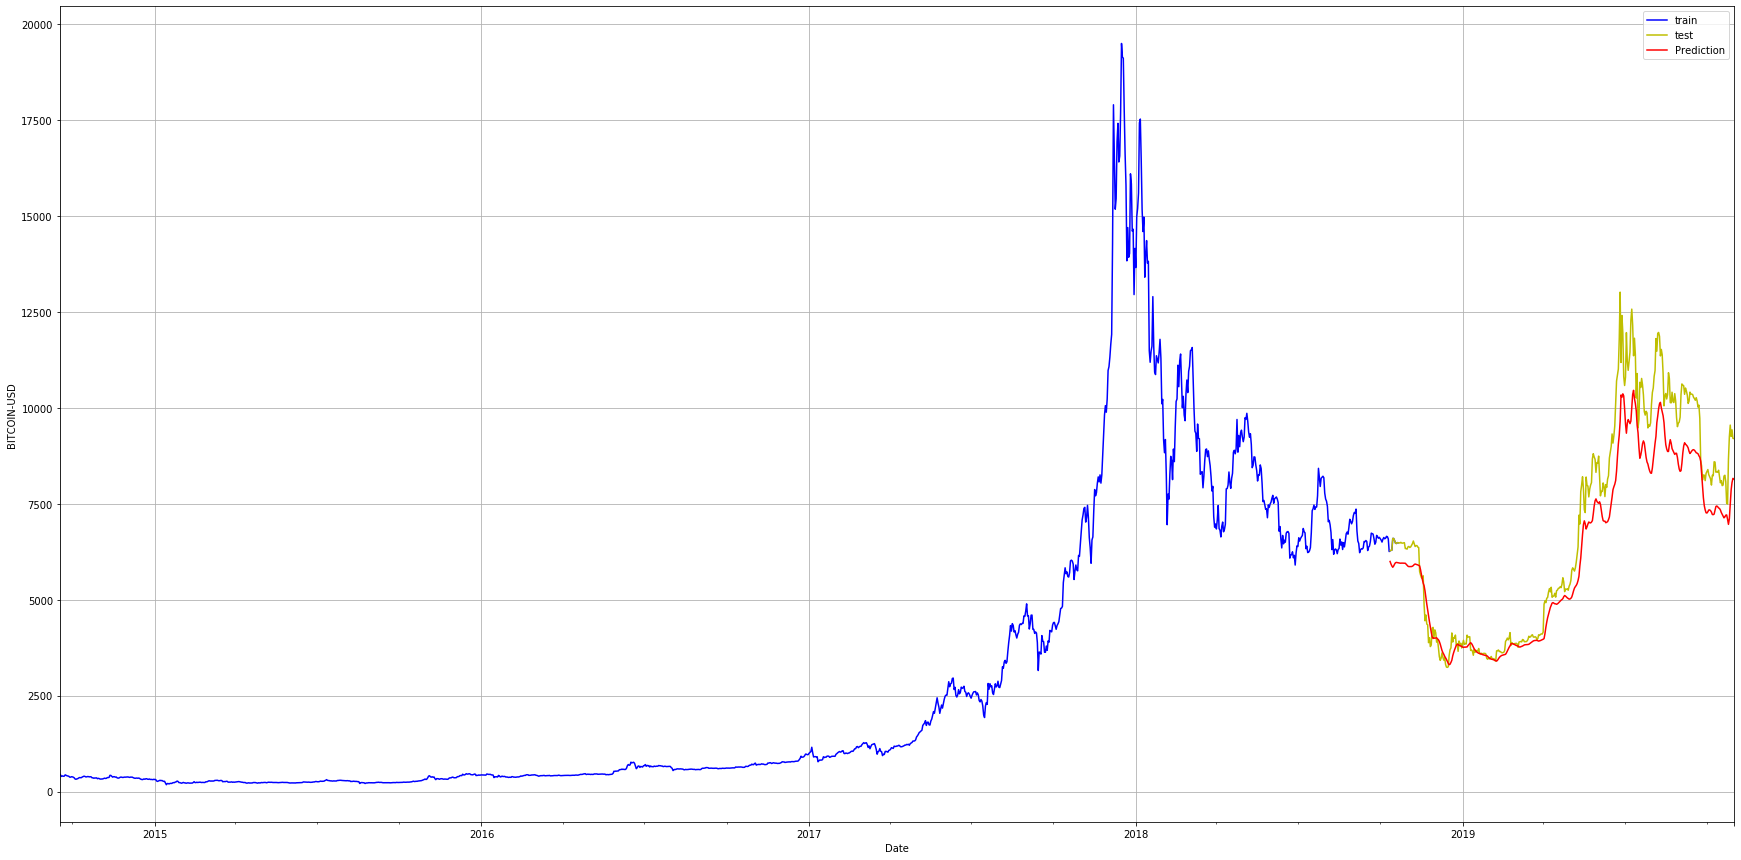

In [72]:
#for plotting
#train = new_data[:987]
#valid = new_data[987:]
train, valid = new_data[0:int(len(new_data)*0.8)], new_data[int(len(new_data)*0.8)-teps:]

valid['Predictions'] = closing_price




#plt.plot(train['Close'])
#plt.plot(valid[['Close','Predictions']])
ax = train['Close'].plot(x='Date', y='Close', style='b-', grid=True)
ax = valid['Close'].plot(x='Date', y='Close', style='y-', grid=True, ax=ax)
ax = valid['Predictions'].plot(x='Date', y='Predictions', style='r-', grid=True, ax=ax)
ax.legend(['train','test', 'Prediction'])
ax.set_xlabel("Date")
ax.set_ylabel("BITCOIN-USD")
#plt.savefig("BTC_predictions.png")

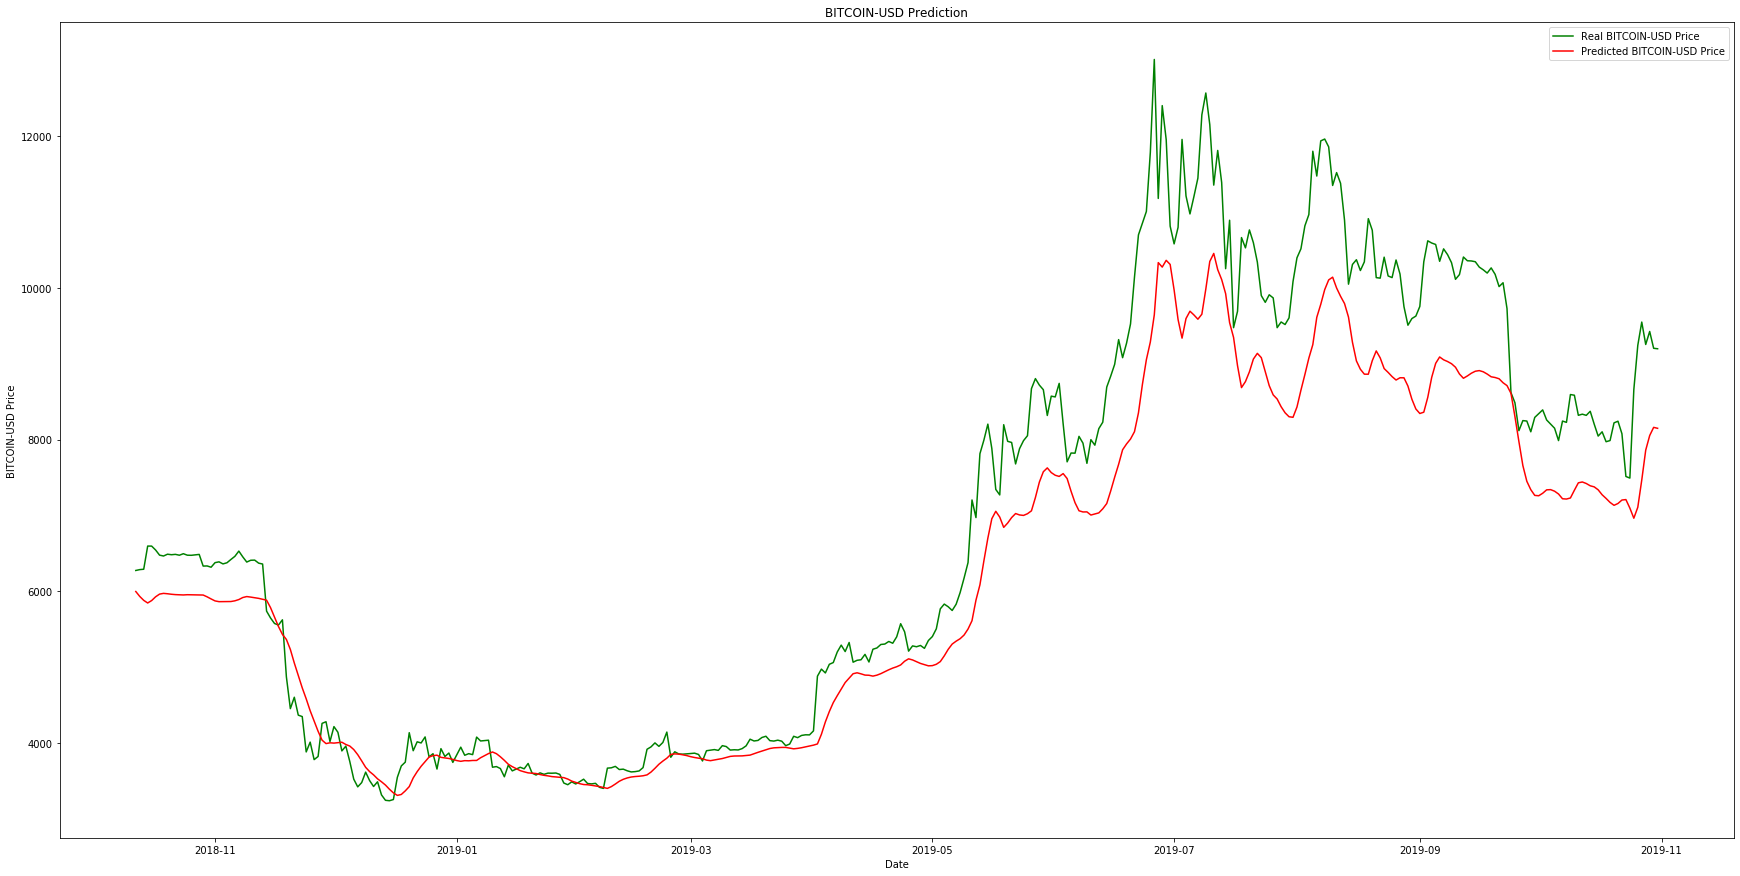

<Figure size 2160x1080 with 0 Axes>

In [73]:
# Visualising the results
plt.plot( valid['Close'], color = 'green', label = 'Real BITCOIN-USD Price')
plt.plot( valid['Predictions'], color = 'red', label = 'Predicted BITCOIN-USD Price')
plt.title('BITCOIN-USD Prediction')
plt.xlabel('Date')
plt.ylabel('BITCOIN-USD Price')
plt.legend()
plt.show()
plt.savefig("BTC_USD_predictions.png")

# 5-Conclusion

**References**
https://colah.github.io/posts/2015-08-Understanding-LSTMs/

https://machinelearningmastery.com/save-arima-time-series-forecasting-model-python/



https://acadpubl.eu/hub/2018-119-17/3/214.pdf